# Is Even MNIST

In [1]:
import itertools
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

random_seed = 20181401
random.seed(random_seed)
np.random.seed(random_seed)
torch.manual_seed(random_seed)
torch.cuda.manual_seed(random_seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [2]:
training_epochs = 10
batch_size = 32
mnist_train = datasets.MNIST(root="datasets/", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="datasets/", train=False, transform=transforms.ToTensor(), download=True)
mnist_train_dataloader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, drop_last=True)
mnist_test_dataloader = DataLoader(mnist_test, batch_size=batch_size)

print("X:", mnist_train.data.shape)
print("Y:", mnist_train.targets.shape)

X: torch.Size([60000, 28, 28])
Y: torch.Size([60000])


In [3]:
w = torch.zeros((28 * 28, 1), requires_grad=True, device=device)
b = torch.zeros(1, requires_grad=True, device=device)
optimizer = torch.optim.Adam([w, b], lr=0.0001)

In [4]:
def calculate_accurancy():
  with torch.no_grad():
    accurancy = 0
    batch_count = len(mnist_test_dataloader)

    for x, y in mnist_test_dataloader:
      assert isinstance(x, torch.Tensor)
      assert isinstance(y, torch.Tensor)
      x = x.view(-1, 28 * 28).to(device)
      y = (y.bitwise_and(1) == 0).view(-1, 1).byte().to(device)

      hypothesis = torch.sigmoid(x.matmul(w) + b)
      prediction = (hypothesis > 0.5)
      correct_prediction = (prediction == y)
      accurancy += correct_prediction.float().mean().item() / batch_count
  
    return accurancy

In [5]:
print("epoch =", 0, "/", "accurancy = {:.3f}%".format(calculate_accurancy() * 100))

for epoch in range(training_epochs):
  avg_cost = 0
  batch_count = len(mnist_train_dataloader)

  for iteration, (x, y) in enumerate(mnist_train_dataloader):
    assert isinstance(x, torch.Tensor)
    assert isinstance(y, torch.Tensor)
    x = x.view(-1, 28 * 28).to(device)
    y = (y.bitwise_and(1) == 0).view(-1, 1).byte().to(device)

    hypothesis = torch.sigmoid(x.matmul(w) + b)
    cost = -torch.mean(y * torch.log(hypothesis) + (1 - y) * torch.log(1 - hypothesis))

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    avg_cost += cost.item() / batch_count
  
  print("epoch =", (epoch + 1), "/", "cost =", avg_cost, "/", "accurancy = {:.3f}%".format(calculate_accurancy() * 100))

epoch = 0 / accurancy = 50.739%
epoch = 1 / cost = 0.4711078608512869 / accurancy = 84.934%
epoch = 2 / cost = 0.3542054888407395 / accurancy = 86.402%
epoch = 3 / cost = 0.3230866429845489 / accurancy = 87.550%
epoch = 4 / cost = 0.3076280817945804 / accurancy = 87.819%
epoch = 5 / cost = 0.29798976557652207 / accurancy = 88.019%
epoch = 6 / cost = 0.2911661381165187 / accurancy = 88.309%
epoch = 7 / cost = 0.2859744342207908 / accurancy = 88.648%
epoch = 8 / cost = 0.28186314555803904 / accurancy = 88.898%
epoch = 9 / cost = 0.27853084531227723 / accurancy = 88.838%
epoch = 10 / cost = 0.2757345964153609 / accurancy = 89.157%


Label: False
Prediction: False


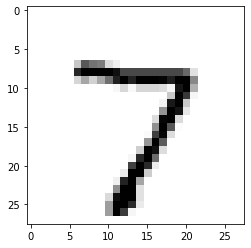

Label: True
Prediction: True


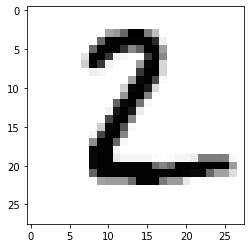

Label: False
Prediction: False


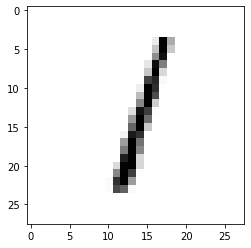

Label: True
Prediction: True


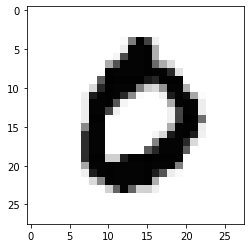

Label: True
Prediction: True


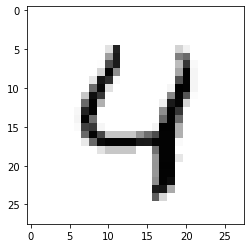

Label: False
Prediction: False


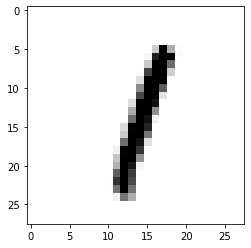

Label: True
Prediction: True


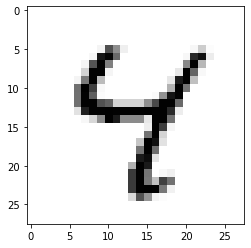

Label: False
Prediction: False


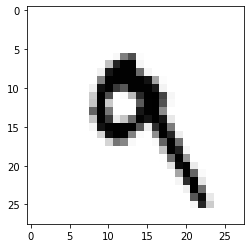

Label: False
Prediction: True


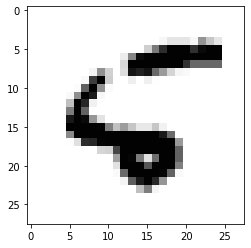

Label: False
Prediction: False


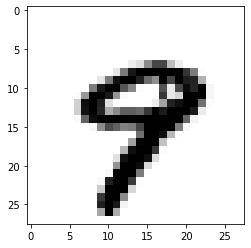

Label: True
Prediction: True


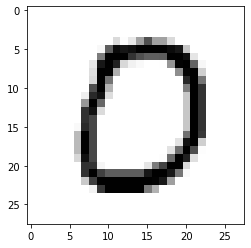

Label: True
Prediction: True


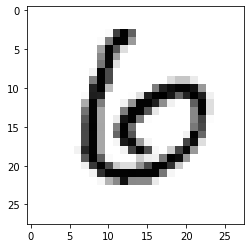

Label: False
Prediction: False


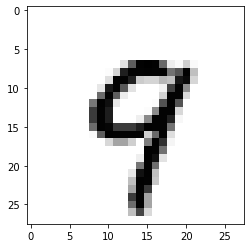

Label: True
Prediction: True


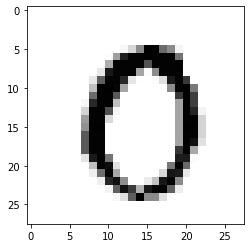

Label: False
Prediction: False


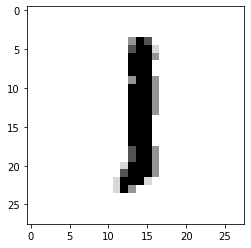

Label: False
Prediction: False


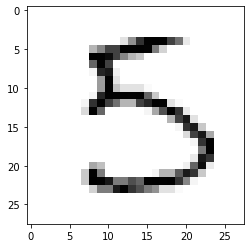

Label: False
Prediction: False


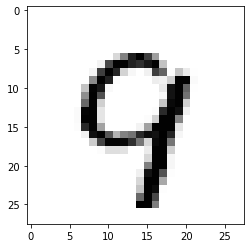

Label: False
Prediction: False


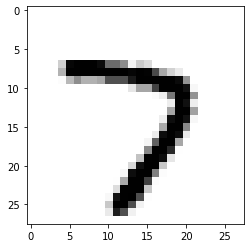

Label: False
Prediction: False


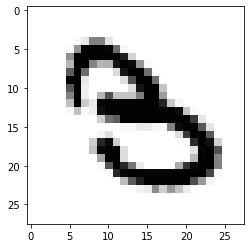

Label: True
Prediction: True


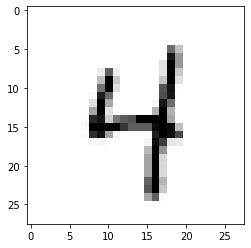

In [6]:
with torch.no_grad():
  for x, y in itertools.islice(DataLoader(mnist_test, batch_size=1), 20):
    assert isinstance(x, torch.Tensor)
    assert isinstance(y, torch.Tensor)
    x = x.view(-1, 28 * 28).to(device)
    y = (y.bitwise_and(1) == 0).view(-1, 1).byte().to(device)

    hypothesis = torch.sigmoid(x.matmul(w) + b)
    prediction = (hypothesis > 0.5).item()

    print("Label:", y.bool().item())
    print("Prediction:", prediction)
    plt.imshow(x.cpu().view(28, 28), cmap=plt.cm.Greys, interpolation="nearest")
    plt.show()